<a href="https://colab.research.google.com/github/sqbitegh/Colabs/blob/main/DataAnalyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install toolz==0.12.0
#!pip install matplotlib==3.7.1

In [3]:
from typing import List, Callable, Tuple
from toolz import pipe, map, filter, partial, reduce, concat, take, drop
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px


In [2]:
from typing import List, Callable, Tuple
from toolz import pipe, map, filter, partial, reduce, concat, take, drop
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import plotly.express as px

def read_vectors(filepath: str, max_rows: int = None) -> List[List[float]]:
  """Reads a file containing newline-separated vectors and returns a list of vectors."""
  with open(filepath, 'r') as file:
      if max_rows is None:
        return [[float(num) for num in line.split()] for line in file if line.strip() and 'end' not in line]
      else:
        return [[float(num) for num in line.split()] for line in file if line.strip() and 'end' not in line][:max_rows]
    #return [[float(num) for num in line.split()] for line in file if line.strip()]

def map_vectors(func: Callable[[List[float]], List[float]], vectors: List[List[float]]) -> List[List[float]]:
  """Applies a function to each vector in the list."""
  return list(map(func, vectors))

def filter_vectors(predicate: Callable[[List[float]], bool], vectors: List[List[float]]) -> List[List[float]]:
  """Filters the list of vectors based on a predicate."""
  return list(filter(predicate, vectors))

def sort_vectors_by_column(vectors: List[List[float]], column_index: int, reverse: bool = False) -> List[List[float]]:
  """Sorts the list of vectors by a specific column."""
  return sorted(vectors, key=lambda vector: vector[column_index], reverse=reverse)

def zip_vectors(vectors1: List[List[float]], vectors2: List[List[float]]) -> List[Tuple[List[float], List[float]]]:
  """Zips two lists of vectors together."""
  return list(zip(vectors1, vectors2))

def concat_vectors(vectors1: List[List[float]], vectors2: List[List[float]]) -> List[List[float]]:
  """Concatenates two lists of vectors."""
  return list(concat([vectors1, vectors2]))

def cut_vectors(vectors: List[List[float]], start_index: int, end_index: int) -> List[List[float]]:
  """Cuts a list of vectors by index ranges."""
  return list(take(end_index, drop(start_index, vectors)))

def read_bool_vector(filepath: str) -> List[float]:
  """Reads a file containing newline-separated boolean strings (True/False)
  and converts them to a list of floats (1.0/0.0)."""
  with open(filepath, 'r') as file:
    return [1.0 if line.strip() == 'True' else 0.0 for line in file if 'end' not in line]

def add_dimension(vectors: List[List[float]], new_dimension: List[float]) -> List[List[float]]:
    """Adds a new dimension as the first element to each vector."""
    return [[new_val] + vec for new_val, vec in zip(new_dimension, vectors)]

def squeeze_columns(vectors: List[List[float]], c1: int, c2: int) -> List[List[float]]:
    """Squeezes columns from c1 to c2 (inclusive) into a single column by addition.
    Handles c1=0 correctly.
    """
    return list(map(lambda vector: ([sum(vector[c1:c2])] + vector[c2:]) if c1 == 0
                                  else (vector[:c1-1] + [sum(vector[c1-1:c2])] + vector[c2:]),
                   vectors))

def print_vector_info(vectors: List[List[float]]) -> None:
  """Prints the size and dimensions of the list of vectors."""
  num_vectors = len(vectors)
  if num_vectors > 0:
    vector_dim = len(vectors[0])
  else:
    vector_dim = 0  # Handle empty list case

  print(f"Number of vectors: {num_vectors}")
  print(f"Dimension of vectors: {vector_dim}")

  # Using NumPy for a more concise output
  if num_vectors > 0:
    print(f"Shape of vectors (NumPy): {np.array(vectors).shape}")


def visualize_output(output):
    """Visualizes the output matrix using matplotlib with a hybrid colormap."""
    # Define colors for discrete values 1, 2, 3
    discrete_colors = {
        1: 'blue',
        2: 'yellow',
        3: 'red'
    }

    # Define a continuous colormap for values between -10 and 10
    continuous_cmap = plt.cm.RdYlGn_r # Red-Yellow-Green reversed to get Blue-Green-Red

    # Create a custom colormap
    # We'll map values 1, 2, 3 to distinct indices outside the continuous range
    # For example, map 1 to -11, 2 to -12, 3 to -13
    # The continuous range will be mapped from -10 to 10
    all_colors = []
    bounds = []

    # Add colors for values outside the -10 to 10 range (for 1, 2, 3)
    # Map 1 to -13, 2 to -12, 3 to -11 to keep them distinct and below -10
    all_colors.append(discrete_colors[1])
    bounds.append(-13)
    all_colors.append(discrete_colors[2])
    bounds.append(-12)
    all_colors.append(discrete_colors[3])
    bounds.append(-11)


    # Add colors from the continuous colormap
    num_continuous_colors = 256 # Number of colors in the continuous colormap
    continuous_bounds = np.linspace(-10, 10, num_continuous_colors)
    for i in range(num_continuous_colors):
        all_colors.append(continuous_cmap(i/num_continuous_colors))
        bounds.append(continuous_bounds[i])

    # Ensure bounds are strictly increasing
    bounds = sorted(list(set(bounds)))

    # Create the custom colormap
    cmap = ListedColormap(all_colors)
    norm = plt.Normalize(min(bounds), max(bounds))


    num_rows = len(output)
    if num_rows == 0:
        print("Output is empty. Cannot visualize.")
        return
    num_cols = len(output[0]) if num_rows > 0 else 0
    if num_cols == 0:
        print("Output rows are empty. Cannot visualize.")
        return

    # Convert output to a NumPy array
    output_array = np.array(output)

    # Map discrete values to their chosen indices
    mapped_output = np.copy(output_array)
    mapped_output[mapped_output == 1.0] = -13
    mapped_output[mapped_output == 2.0] = -12
    mapped_output[mapped_output == 3.0] = -11


    # Determine figure size based on the number of rows and columns
    fig_width = num_cols * 0.1
    fig_height = num_rows * 0.1

    plt.figure(figsize=(fig_width, fig_height))

    # Display the output using imshow with the custom colormap and normalization
    plt.imshow(mapped_output, aspect='auto', interpolation='nearest', cmap=cmap, norm=norm)
    plt.colorbar() # Add a colorbar to show the mapping

    # Set y-axis ticks to show every 10 rows
    plt.yticks(np.arange(0, num_rows, 10))

    plt.show()



def visualize_output2(output, columns, s_row=0, n_rows=None):
  """
  Visualizes the output based on specified columns using Plotly.

  Args:
    output: The output data (list of lists).
    columns: A list of column indices to visualize (length 2 for 2D, 3 for 3D).
  """
  if len(columns) < 2 or len(columns) > 3:
    print("Please provide either 2 or 3 column indices for visualization.")
    return

  # Convert output to a NumPy array for easier column access
  output_array = np.array(output)
  if n_rows is not None:
      output_array = output_array[s_row:n_rows]
  else:
      output_array = output_array[s_row:]

  if len(columns) == 2:
    x_col = columns[0]
    y_col = columns[1]
    if x_col >= output_array.shape[1] or y_col >= output_array.shape[1]:
      print("Invalid column index provided.")
      return

    fig = px.scatter(x=output_array[:, x_col], y=output_array[:, y_col],  width=300, height=300)
    fig.update_layout(
        xaxis_title=f"Column {x_col}",
        yaxis_title=f"Column {y_col}",
        title="2D Scatter Plot"
    )
    fig.show()

  elif len(columns) == 3:
    x_col = columns[0]
    y_col = columns[1]
    z_col = columns[2]
    if x_col >= output_array.shape[1] or y_col >= output_array.shape[1] or z_col >= output_array.shape[1]:
      print("Invalid column index provided.")
      return

    fig = px.scatter_3d(x=output_array[:, x_col], y=output_array[:, y_col], z=output_array[:, z_col], width=300, height=300)
    fig.update_layout(
        scene = dict(
            xaxis_title=f"Column {x_col}",
            yaxis_title=f"Column {y_col}",
            zaxis_title=f"Column {z_col}"),
        title="3D Scatter Plot"
    )
    fig.show()

In [20]:
def initialize_datavector(activations_filename, correctness_vals):
  vectors = read_vectors(activations_filename, None)  # Assuming vectors are stored in 'vectors.txt'
  if correctness_vals is None:
    bool_vector = [1.0] * len(vectors)
  else:
    bool_vector = read_bool_vector(correctness_vals)  # Assuming boolean strings are in 'bool_vector.txt'
  print_vector_info(vectors)
  #print(f"bool_vector {bool_vector}")
  # Add the boolean vector as the first dimension to the existing vectors
  merged_vectors = add_dimension(vectors, bool_vector) #if not equal length truncate to shorter

  # Add a sequence number as the last column
  for i in range(len(merged_vectors)):
    merged_vectors[i].append(float(i))

  print(f"merged_vectors {merged_vectors[:10]}")
  print_vector_info(merged_vectors)
  return merged_vectors

def process_vectors_EuclChart(merged_vectors,cols, s_row, n_rows):
  visualize_output2(merged_vectors, cols, s_row, n_rows)


def process_vectors(activations_filename, correctness_vals, sort_range, max_rows):
  vectors = read_vectors(activations_filename, max_rows)  # Assuming vectors are stored in 'vectors.txt'
  if correctness_vals is None:
    bool_vector = [1.0] * len(vectors)
  else:
    bool_vector = read_bool_vector(correctness_vals)  # Assuming boolean strings are in 'bool_vector.txt'
  print_vector_info(vectors)
  print(f"bool_vector {bool_vector}")

  # Add the boolean vector as the first dimension to the existing vectors
  merged_vectors = add_dimension(vectors, bool_vector)
  print(f"merged_vectors {merged_vectors}")
  print_vector_info(merged_vectors)
  #merged_vectors = squeeze_columns(merged_vectors, 1, 6)
  #merged_vectors = squeeze_columns(merged_vectors, 8, 11)
  print(f"merged_vectors squeezed {merged_vectors}")
  print_vector_info(merged_vectors)
  print("filterby first column")
  merged_vectors = filter_vectors(lambda vector: vector[0] == 1.0, merged_vectors)
  print_vector_info(merged_vectors)
  process_vectors2(merged_vectors, sort_range)

def process_vectors4(activations_filename, correctness_vals, sort_range, max_rows, squeeze_factor, compute_deriv_sign=True, a=1.0, b=0.0):
    datavector = initialize_datavector(activations_filename, correctness_vals)
    print_vector_info(datavector)

    #squeeze_factor = 32
    squeezed_datavector = []
    for vector in datavector:
        new_vector = []
        for i in range(1, len(vector)-1, squeeze_factor):
            new_vector.append(sum(vector[i:i+squeeze_factor]) / squeeze_factor)
        # Add the first column (correctness value) and the last column (sequence number) back to the new vector
        squeezed_datavector.append([vector[0]] + new_vector + [vector[-1]/10.0])


    print_vector_info(squeezed_datavector)
    process_vectors2(squeezed_datavector, sort_range, compute_deriv_sign,a , b)

def process_vectors2(merged_vectors, sort_range, compute_deriv_sign=True, a=1.0, b=0.0):
  if sort_range is None:
    sorted_vectors = merged_vectors
    result = process_vectors3(sorted_vectors, compute_deriv_sign, a, b)
    #print(f"output {result}")
    print_vector_info(result)
    visualize_output(result)
  else:
    for sort_column in sort_range:
      sorted_vectors = sort_vectors_by_column(merged_vectors, column_index=sort_column)
      result = process_vectors3(sorted_vectors, compute_deriv_sign, a, b)
      print(f"sort by {sort_column}")
      print_vector_info(result)
      visualize_output(result)
  #sorted_vectors = merged_vectors
  #sorted_vectors = filter_vectors(lambda vector: vector[0] == 1.0, sorted_vectors)

  #print (f"sorted_vectors {sorted_vectors}")
  #print_vector_info(sorted_vectors)

def process_vectors3(sorted_vectors, compute_deriv_sign=True, a=1.0, b=0.0):
    # 2. Compare adjacent elements in each column and generate output
  output = []
  for i in range(len(sorted_vectors)):
    current_vector_output = []  # Output for the current vector
    # Skip the first row for comparison
    if i > 0:
      for j in range(1, len(sorted_vectors[i])-1):  # Start from the second column (index 1), omit first column (always 1) omit last column (that is seq no)
        if compute_deriv_sign == True:
          if sorted_vectors[i][j] > sorted_vectors[i - 1][j]:
            current_vector_output.append(3)
          elif sorted_vectors[i][j] == sorted_vectors[i - 1][j]:
            current_vector_output.append(2)
          else:
            current_vector_output.append(1)
        else:
          current_vector_output.append( sorted_vectors[i][j]*a + b)
          #current_vector_output.append( sorted_vectors[i][j]*20.0 -21.0)
      current_vector_output.append( sorted_vectors[i][len(sorted_vectors[i])-1] )
      output.append(current_vector_output)  # Append output for current vector to overall output
  return output

In [ ]:


process_vectors('activations_fc_input_d64_h1_epoch_4_test.txt', 'corrects_list_d64_h1_epoch_4_test.txt', range(1,32))
process_vectors('activations_fc_input_d64_h1_epoch_4_test.txt', 'corrects_list_d64_h1_epoch_4_test.txt', None)
#process_vectors('activations_fc_input_d64_h1_epoch_4_train.txt', 'corrects_list_d64_h1_epoch_4_train.txt', None)



In [ ]:
#from tinystories
process_vectors('sample_data/activations_rec4ep20_f10000.txt',None , None, 1000)
process_vectors('sample_data/activations_rec4ep20_f10000.txt',None , range(5, 12), 600)


#from tinystories, 2-3D

In [ ]:
datavector = initialize_datavector('sample_data/activations_rec6ep20_f10000.txt',None)
#datavector = initialize_datavector('sample_data/activations_rec4ep20_f10000.txt',None)


In [ ]:
process_vectors_EuclChart(datavector, [17 ,18], 700,800)


In [ ]:
print("before sort")
print([row[:5] for row in datavector[0:10]])
sorted_vectors = sort_vectors_by_column(datavector[0:5000], column_index=10)
print("\n\n\nafter sort")
print([row[:5] for row in sorted_vectors[0:10]])
#sorted_vectors = datavector
for x_col in range(10, 11, 1):
    for y_col in range(x_col-4, x_col+10, 1):
      process_vectors_EuclChart(sorted_vectors, [x_col ,y_col], 1,80)
"""
for x_col in range(1, 20, 1):
    for y_col in range(x_col+1, x_col+2, 1):
      process_vectors_EuclChart(sorted_vectors, [x_col ,y_col], 10,100)
"""

Phi2

In [ ]:

process_vectors('sample_data/activations_phi2_factor_c.txt',None , range(1, 12), 1000)


In [ ]:
datavector = initialize_datavector('sample_data/activations_phi2_factor_c.txt',None)


In [ ]:
process_vectors4('sample_data/activations_phi2_factor_c3.txt',None , range(0, 30), 1000, squeeze_factor = 17)
#/content/sample_data/activations_phi2_fcall_c2.txt

In [ ]:
process_vectors_EuclChart(datavector, [8 ,9], 0,800)

tinyllama

Number of vectors: 181
Dimension of vectors: 2048
Shape of vectors (NumPy): (181, 2048)
merged_vectors [[1.0, -0.421082, 0.693964, -0.860379, -2.264612, 1.233486, 0.830988, -0.536872, 0.474853, 0.770456, -0.73237, -1.907727, -1.745697, -2.533497, -2.423662, -0.834862, -0.147053, 0.344153, -0.011808, -0.195635, -0.457463, 2.657728, -0.463237, 1.43014, 0.508663, 0.328795, -0.512441, -1.588943, -0.106322, -1.361442, 0.245161, 3.029059, 2.493244, 2.961539, 0.479361, 1.260118, -0.782576, -1.125708, 3.364944, -0.336847, 1.595882, 3.221968, -1.05002, 2.714467, -0.257205, -1.928512, -0.045017, -0.761909, 2.145962, 1.685403, 0.230403, -0.559611, -1.389182, 2.643193, 3.346819, -0.341235, 2.438712, -0.577827, 2.582896, 0.065797, -2.421713, -1.506377, -0.131897, 1.381026, 3.995912, 0.285045, -2.708593, 0.644165, -1.173076, 0.885037, 1.42915, -0.747398, -1.198328, 0.296436, -2.931625, 0.686869, 4.050124, 1.208203, -1.569514, -2.145651, -3.824414, 2.068728, 0.190527, -0.903508, 0.473786, -1.225888, 

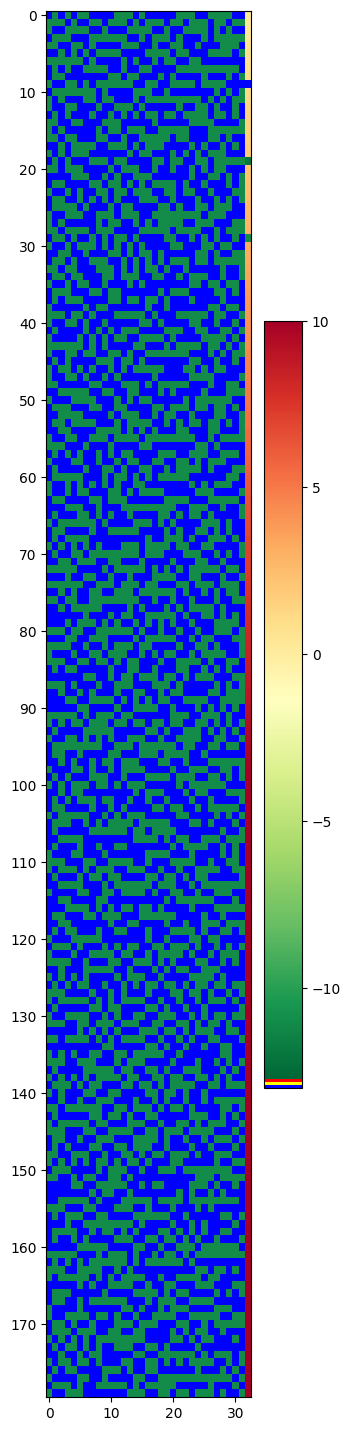

sort by 1
Number of vectors: 180
Dimension of vectors: 33
Shape of vectors (NumPy): (180, 33)


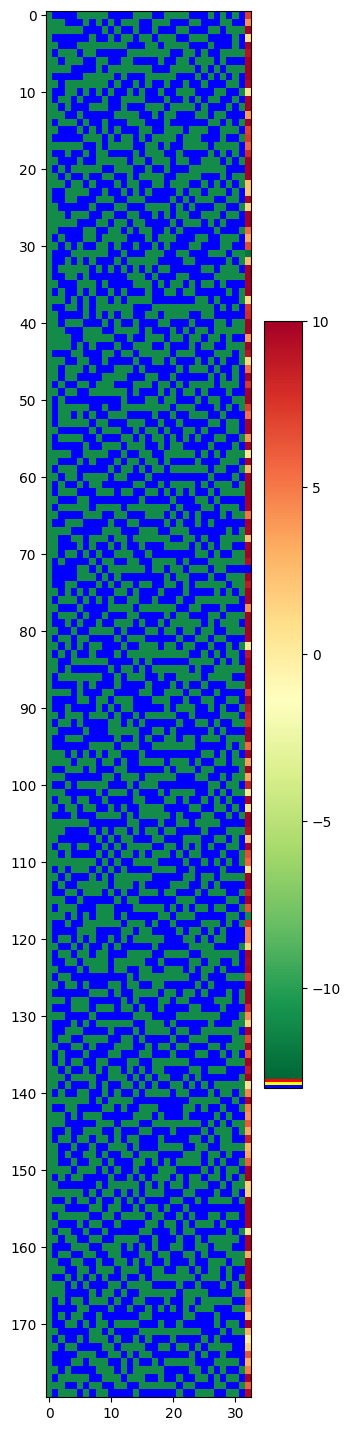

sort by 2
Number of vectors: 180
Dimension of vectors: 33
Shape of vectors (NumPy): (180, 33)


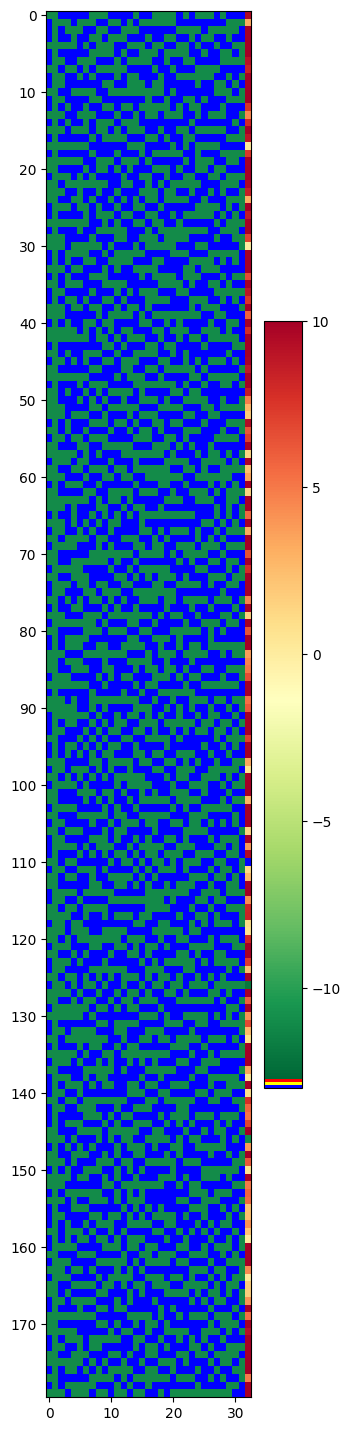

sort by 3
Number of vectors: 180
Dimension of vectors: 33
Shape of vectors (NumPy): (180, 33)


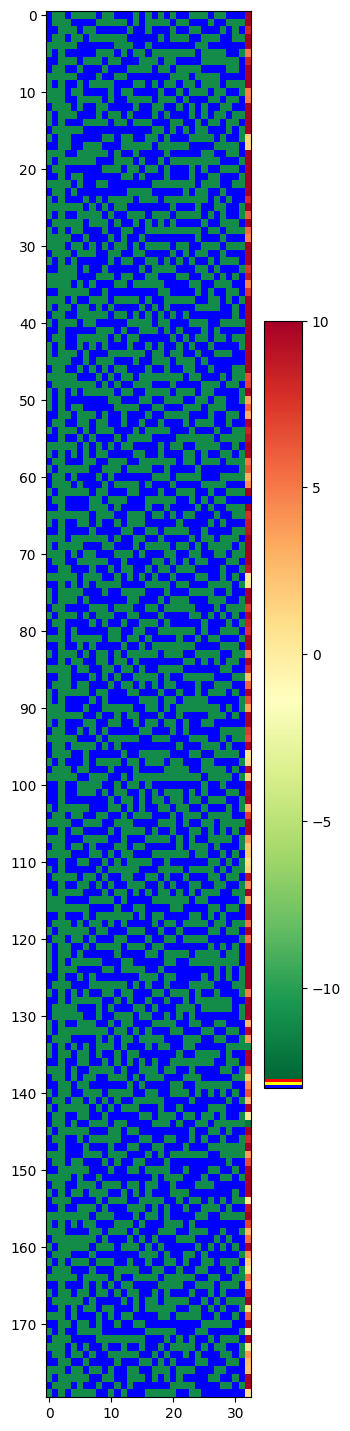

sort by 4
Number of vectors: 180
Dimension of vectors: 33
Shape of vectors (NumPy): (180, 33)


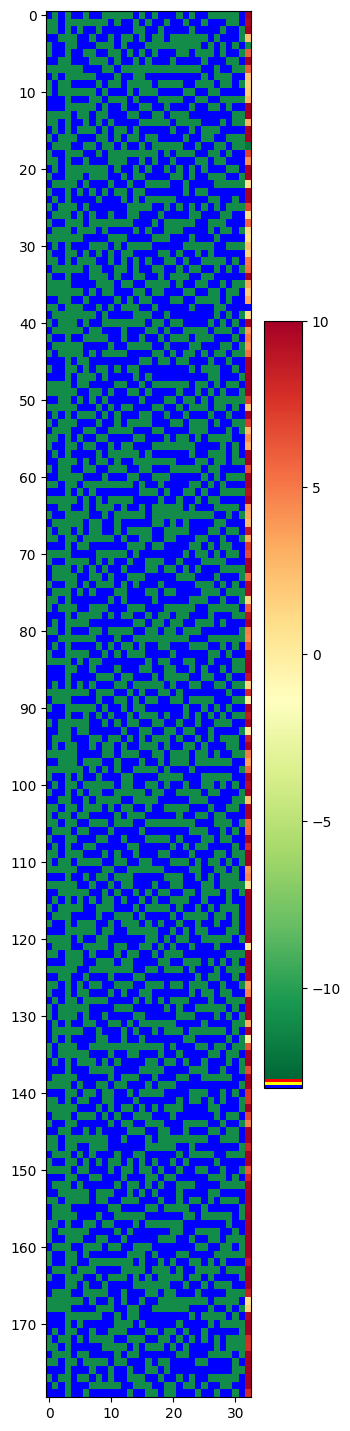

sort by 5
Number of vectors: 180
Dimension of vectors: 33
Shape of vectors (NumPy): (180, 33)


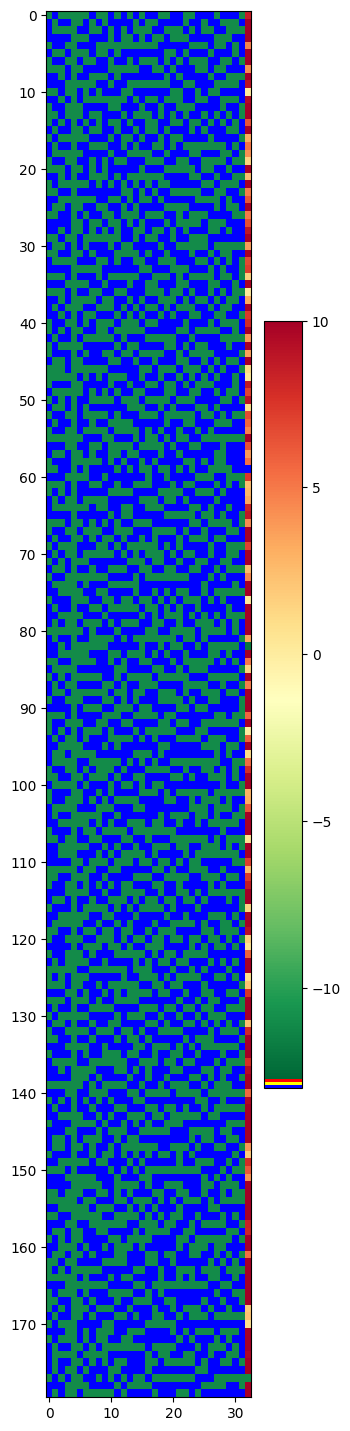

sort by 6
Number of vectors: 180
Dimension of vectors: 33
Shape of vectors (NumPy): (180, 33)


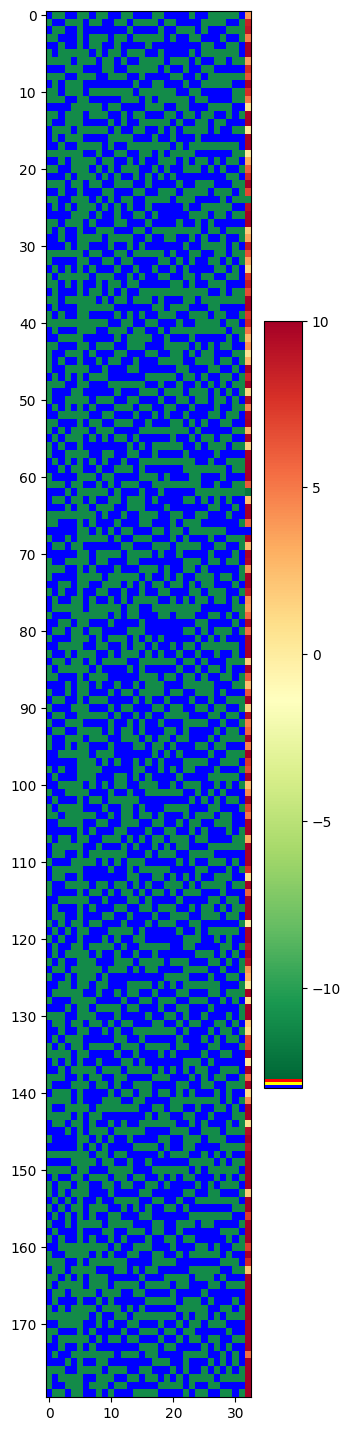

sort by 7
Number of vectors: 180
Dimension of vectors: 33
Shape of vectors (NumPy): (180, 33)


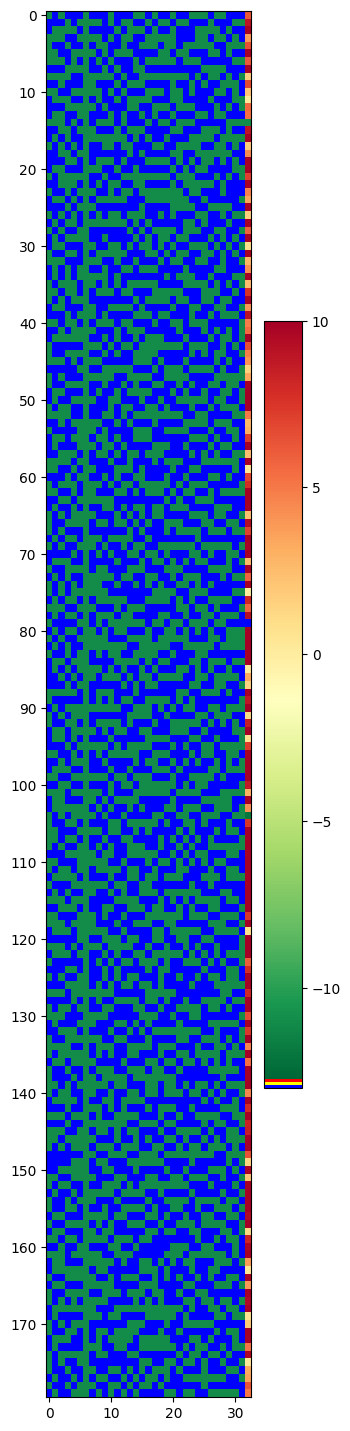

sort by 8
Number of vectors: 180
Dimension of vectors: 33
Shape of vectors (NumPy): (180, 33)


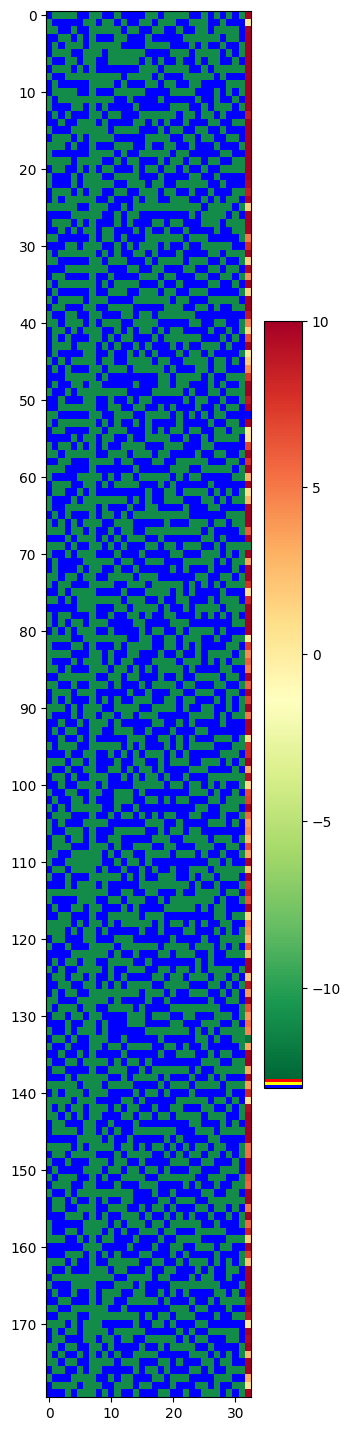

sort by 9
Number of vectors: 180
Dimension of vectors: 33
Shape of vectors (NumPy): (180, 33)


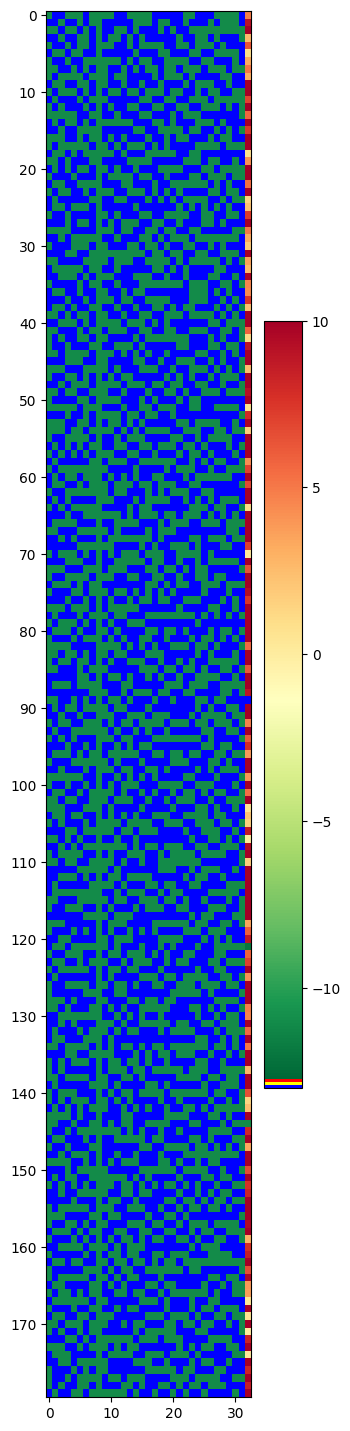

sort by 10
Number of vectors: 180
Dimension of vectors: 33
Shape of vectors (NumPy): (180, 33)


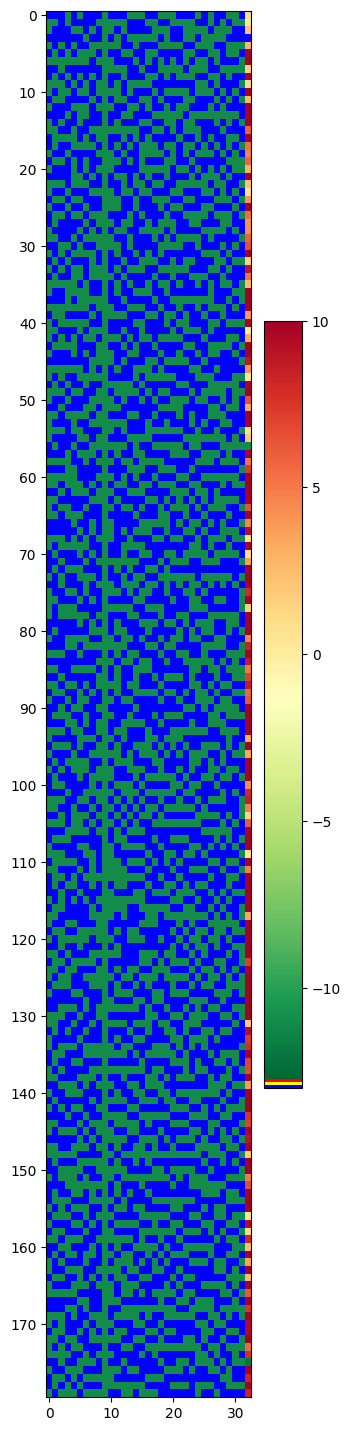

sort by 11
Number of vectors: 180
Dimension of vectors: 33
Shape of vectors (NumPy): (180, 33)


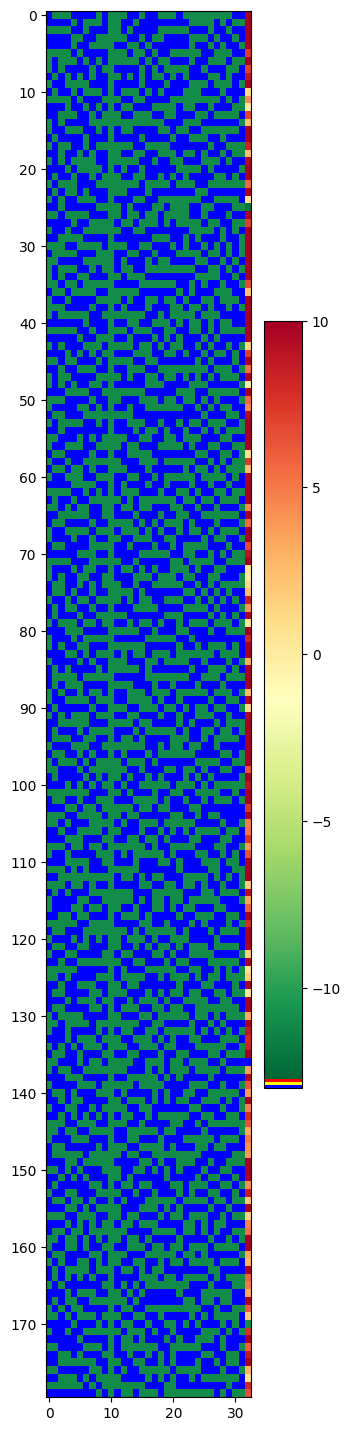

sort by 12
Number of vectors: 180
Dimension of vectors: 33
Shape of vectors (NumPy): (180, 33)


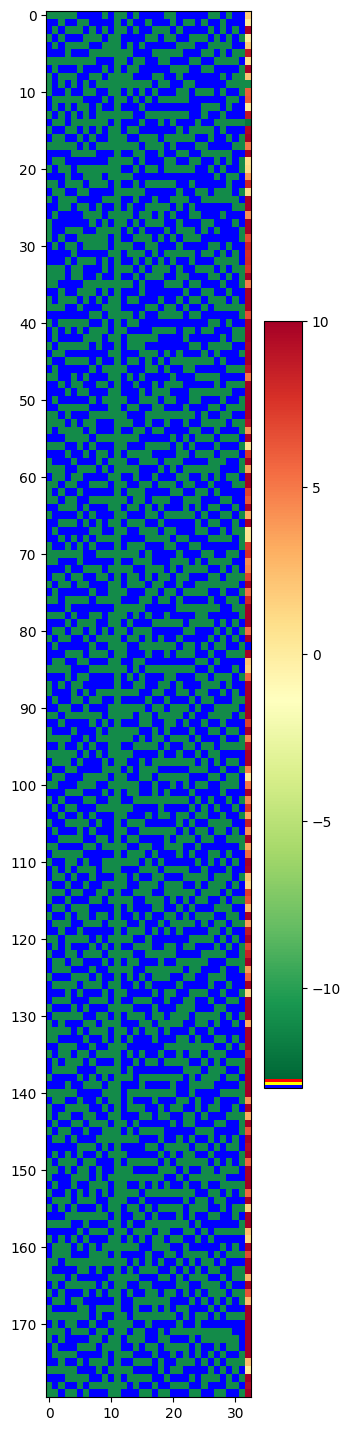

sort by 13
Number of vectors: 180
Dimension of vectors: 33
Shape of vectors (NumPy): (180, 33)


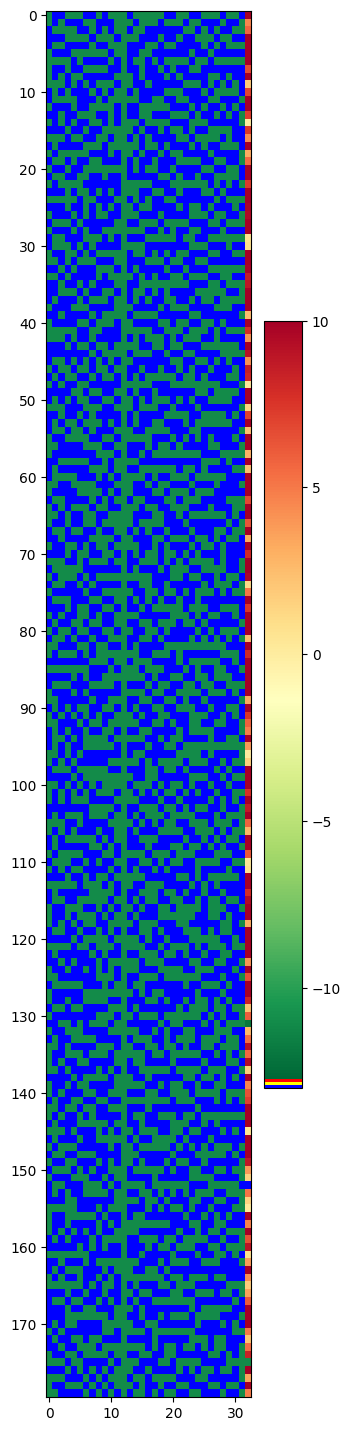

sort by 14
Number of vectors: 180
Dimension of vectors: 33
Shape of vectors (NumPy): (180, 33)


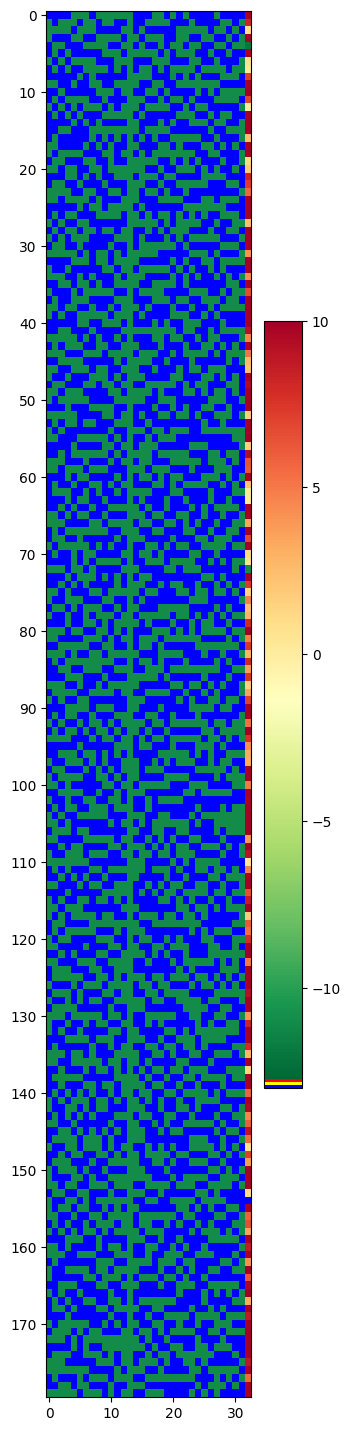

In [32]:

#/content/sample_data/activs_tinyllama_cprrec_cucumb.txt
process_vectors4('sample_data/activs_tinyllama_cprrec_fact.txt',None , range(0, 15), 200
                 , squeeze_factor = 64, compute_deriv_sign=True, a=1.0, b=0.0)
#a=40.0, b=-21.0
#a=20.0, b=-21.0
#a=30.0, b=-21.0
#activs_tinyllama_cnorec_fact
#activs_tinyllama_cprrec_fact
#process_vectors4('sample_data/activations_tinyllama_factor_c5.txt',None , range(20, 33), 200, squeeze_factor = 63)
#content/sample_data/activations_tinyllama_factor_c4.txt

Tests

In [ ]:
#test
process_vectors('example_vectors.txt', 'example_bool_vector.txt', None)
process_vectors('example_vectors.txt', 'example_bool_vector.txt', range(1,3))


In [ ]:
# Example Usage
vectors = read_vectors('example_vectors.txt')  # Assuming vectors are stored in 'vectors.txt'

# Map: Double each element in each vector
doubled_vectors = map_vectors(lambda vector: [x * 2 for x in vector], vectors)

# Filter: Keep vectors where the first element is positive
positive_vectors = filter_vectors(lambda vector: vector[0] > 0, vectors)

# Sort: Sort vectors by the second column in descending order
sorted_vectors = sort_vectors_by_column(vectors, column_index=1, reverse=True)

# Zip: Combine two lists of vectors
zipped_vectors = zip_vectors(vectors, doubled_vectors)

# Concat: Concatenate two lists of vectors
concatenated_vectors = concat_vectors(vectors, doubled_vectors)

# Cut: Get vectors from index 2 to 5
cut_vectors_result = cut_vectors(vectors, start_index=2, end_index=5)

